# Abalone dataset with SVM and MLP

This is a small tutorial about how to predict the Abalone age which are large sean snails, using physical Measurments.
We decided to work with two algorithms: Support vector machines and MLP regressor, because it's a regression problem, and we will try to compare the diffrent results.
So the main goal here is not to have the best accuracy (how much our predictions are close enough to the real value), but to know why certain algortihms are better than the others on a specific dataset.

#### First we Import the libraries we want to work with, it will be explained when used later 

In [72]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
sns.set(color_codes=True) 


Based on the descriptions of the dataset here : , we will name the columns


In [73]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pd.read_csv("abalone.data", names=column_names)
print("Number of samples: %d" % len(data))
data.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In this dataset, we have the sex feature as a string, we will try to change them into a numerical value

In [74]:
data.sex = data.sex.map({'M': 1, 'I': 0, 'F': 2})
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Visualisations with Seaborn

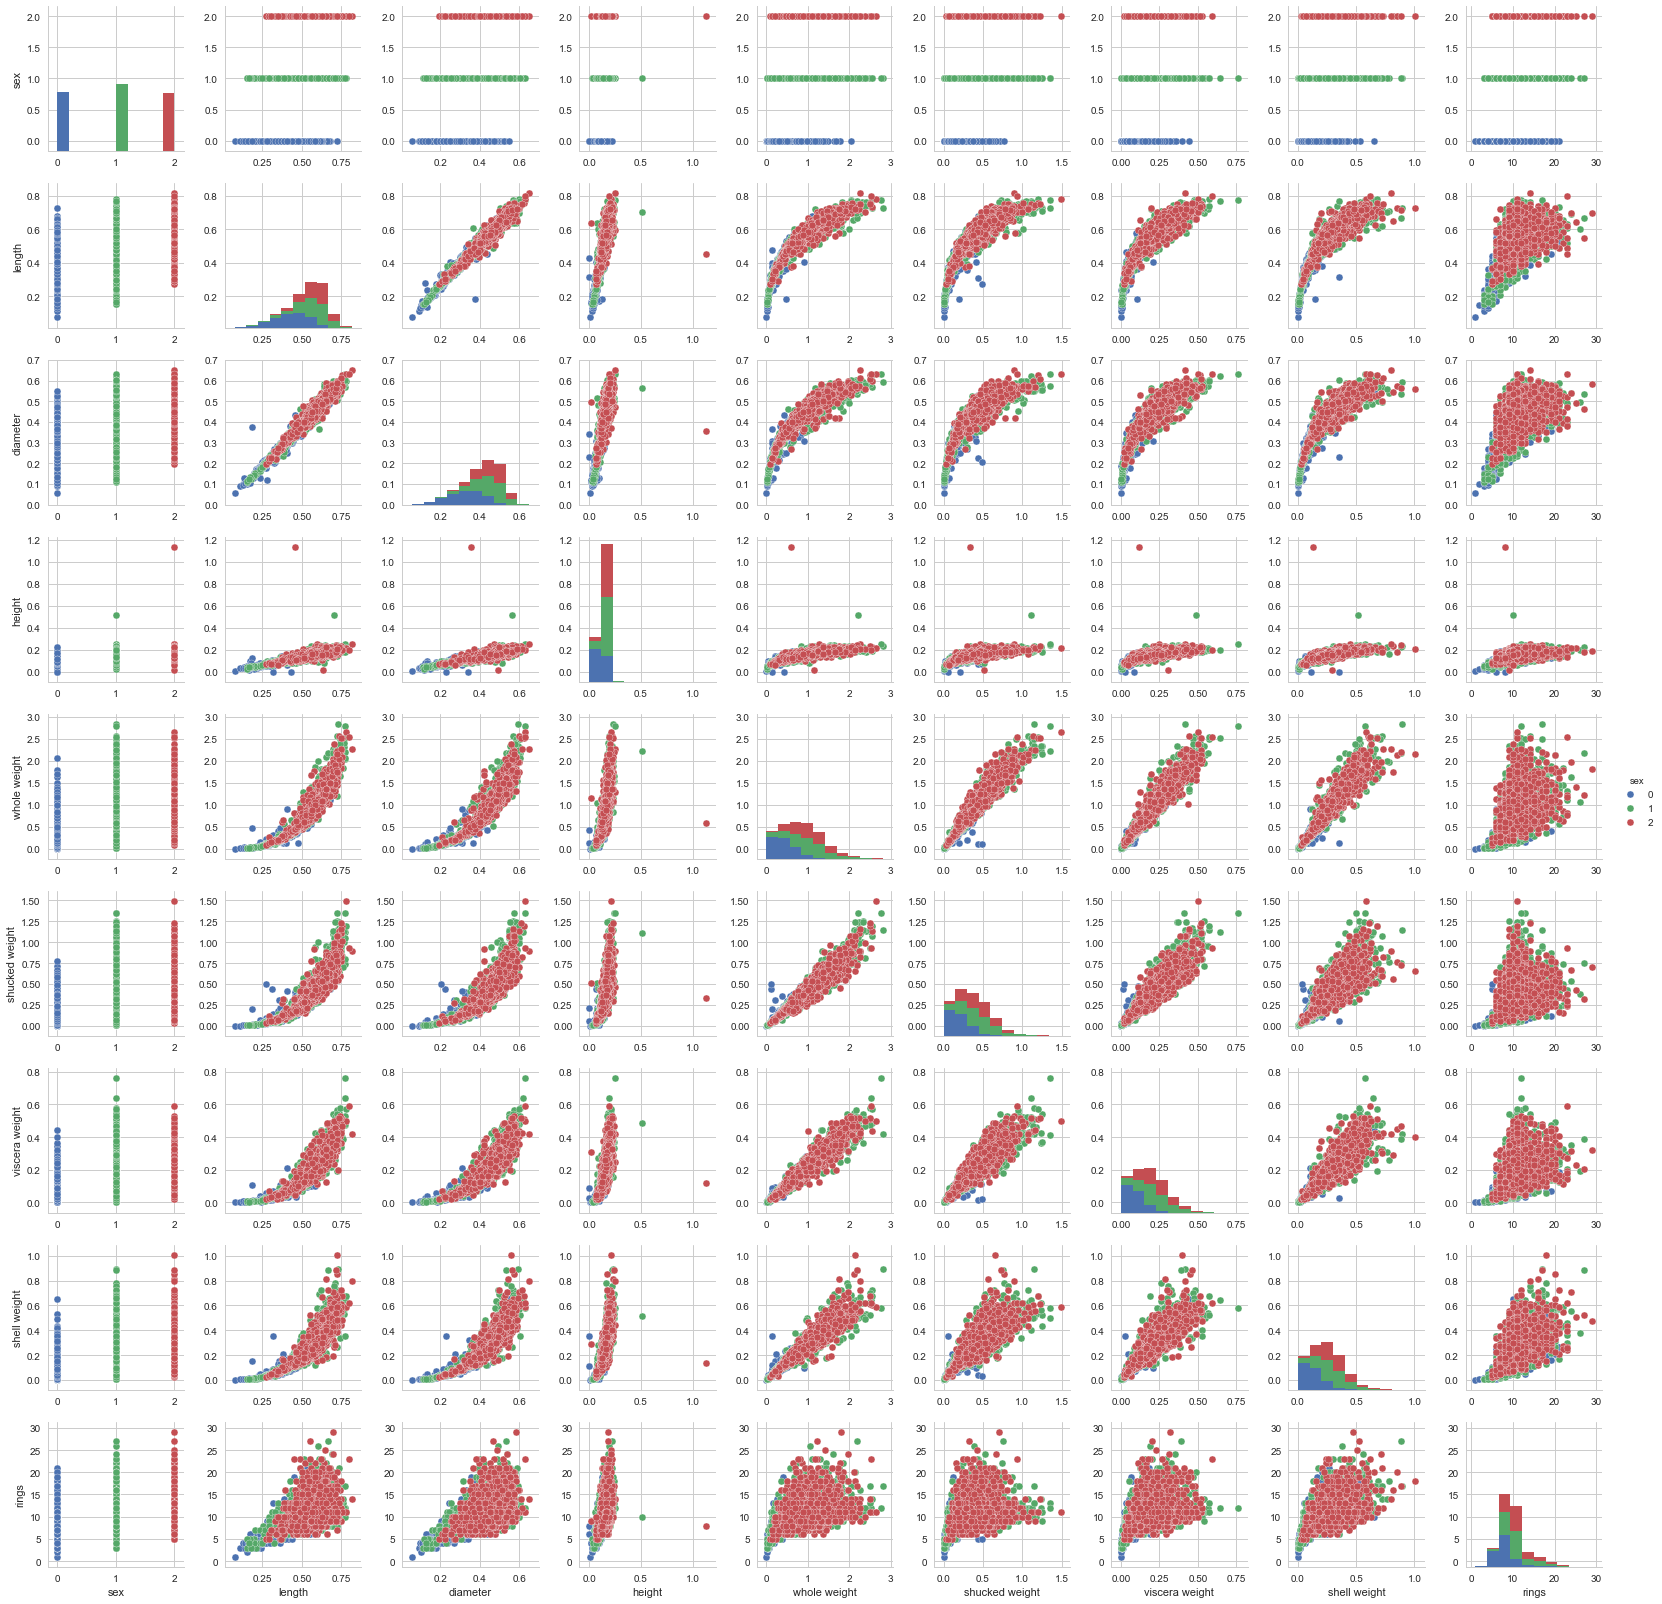

In [75]:
sns.set_style("whitegrid")
plot = sns.pairplot(data, hue = "sex", size=2.5)



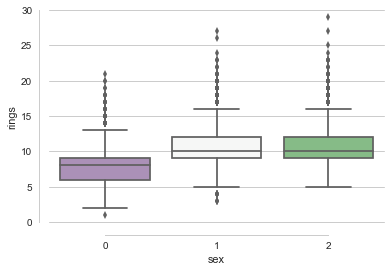

In [76]:
plot = sns.boxplot(x="sex", y="rings",  data=df, palette="PRGn")
sns.despine(offset=10, trim=True)


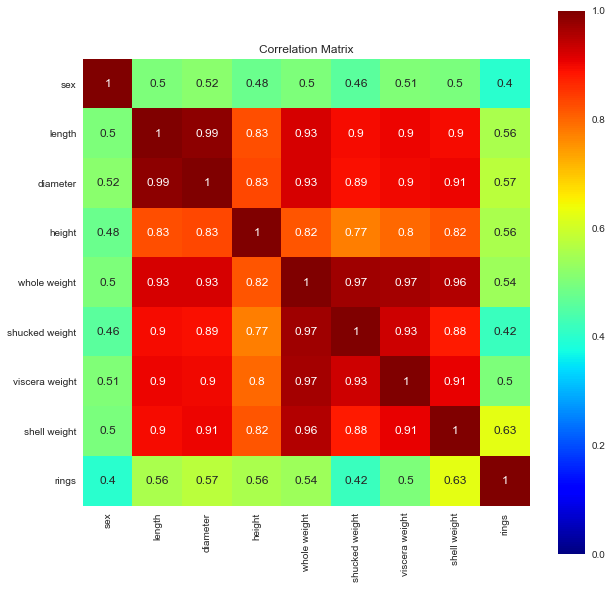

In [77]:
plt.figure(figsize=(10,10))
correlation = df.corr()
sns.heatmap(correlation, square=True,annot=True,vmin=0,vmax=1,cmap='jet')
plt.title('Correlation Matrix')
plt.show()

### Splitting the data
We nees to split the data into train data and test data

In [78]:
X = data.drop(["rings"],axis = 1)
y = data["rings"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## Trying the first algorithm : MLP 

In [80]:
mlp = MLPRegressor(solver ='lbfgs', activation='relu',hidden_layer_sizes=(50,10,5),max_iter = 500)

mlp.fit(X_train,y_train)
predictions = mlp.predict(X_train)
ypredictions = mlp.predict(X_test)

In [70]:
print('Accuracy testing on training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy testing on testing data: {:.3f}'.format(mlp.score(X_test, y_test)))


Accuracy testing on training data: 0.598
Accuracy testing on testing data: 0.583
